In [71]:
import numpy as np
import time
import os
import matplotlib.pyplot as plt 
from Queue import PriorityQueue
import planners
reload(planners)

<module 'planners' from 'c:\Users\herbi\Documents\Spring 2022\6141\racecar_docker\home\racecar_ws\src\path_planning\src\planners.py'>

In [7]:
occupancy_grid_ex_1 = np.array([
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0],
    [0,0,1,0,0,0,0,1,0,0]
    ])
occupancy_grid_ex_2 = np.array([
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0],
    ])

In [65]:
def plan_path(map,planner, start, goal, visualize=True):
    planner = planner(map.flatten('F'),map.shape[0],map.shape[1],1)
    path = planner.find_path(start, goal)
    if visualize:
        plt.figure()
        map[start] = 2
        map[goal] = 3
        plt.imshow(map)
        plt.figure()
        for point in path:
            point = (int(point[0]),int(point[1]))
            if map[point] == 0:
                map[point] = 4
            else:
                map[point] = 5
        plt.imshow(map)
        plt.show()
    return path



Found goal state!


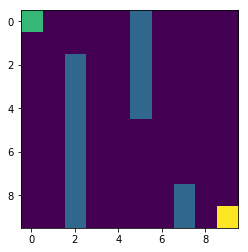

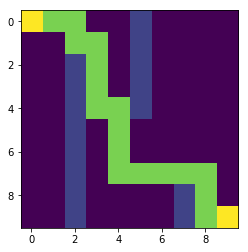

(9, 9)


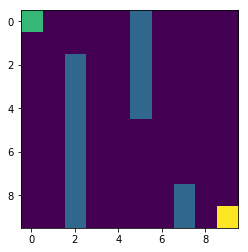

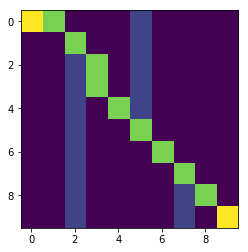

Found goal state!


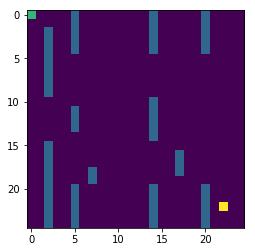

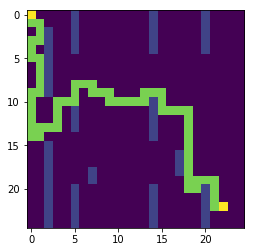

In [72]:
nodes = plan_path(occupancy_grid_ex_1.copy(),planners.RRTPlanner, (0,0), (9,9), visualize=True)
nodes = plan_path(occupancy_grid_ex_1.copy(),planners.AStarPlanner, (0,0), (9,9), visualize=True)
nodes = plan_path(occupancy_grid_ex_2.copy(),planners.RRTPlanner, (0,0), (22,22), visualize=True)
# plt.scatter([node.x for node in nodes],[node.y for node in nodes])
# plan_path(occupancy_grid_ex_2.copy(),planners.RRTPlanner, (0,0), (22,22))

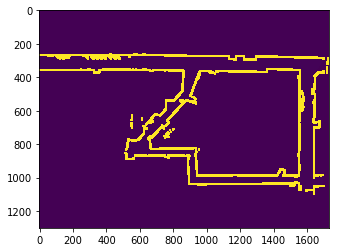

In [14]:
data = np.load('dilated_map.npy')
stata_basement_map = np.reshape(data, (1730, 1300),'F')
stata_basement_map = np.rot90(stata_basement_map)
start = (600, 320)
goal = (1000,320)
for i in range(-4,5):
    for j in range(-4,5):
        )


stata_basement_map[start] = 2
stata_basement_map[goal] = 3
plt.imshow(stata_basement_map)
# plan_path(stata_basement_map, (600, 320), (1000,320), 1)

In [8]:
print(np.unique(stata_basement_map))

[ -1   0 100]
